In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
Data = pd.read_csv('BankNote_Authentication.csv')
X_train, X_test,Y_train,Y_test = train_test_split(Data.iloc[:,:4],Data.iloc[:,-1] ,test_size=0.3, random_state=42)
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

# Logistic regression2

In [3]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b


def forward_propagation(X, W, b):
    z = np.dot(X, W) + b
    a = sigmoid(z)
    return a


def loss(A, Y):
    m = Y.shape[0]
    cost = - (1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    return cost


def backward_propagation(X, z, Y):
    m = X.shape[0]
    dW = (1/m) * np.dot(X.T, (z - Y))
    db = (1/m) * np.sum(z - Y)
    return dW, db


def gradient_descent(X, Y, W, b, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        A = forward_propagation(X, W, b)
        cost = loss(A, Y)
        dW, db = backward_propagation(X, A, Y)
        W-= learning_rate * dW
        b -= learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}: binarycrossentropy = {cost}")
    
    return W, b, costs


def predict(X, W, b):
    A = forward_propagation(X, W, b)
    return np.where(A > 0.5, 1, 0)


features = X_train.shape[1]
W, b = initialize_parameters(features)
iter = 1000
lr = 0.01
W, b, costs = gradient_descent(X_train, Y_train, W, b, lr, iter)

Y_pred_train = predict(X_train, W, b)
Y_pred_test = predict(X_test, W, b)


train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Iteration 0: binarycrossentropy = 0.6931471805599453
Iteration 100: binarycrossentropy = 0.2585893618146986
Iteration 200: binarycrossentropy = 0.1934233295977421
Iteration 300: binarycrossentropy = 0.16335205363301922
Iteration 400: binarycrossentropy = 0.14495099914647766
Iteration 500: binarycrossentropy = 0.13207660085021333
Iteration 600: binarycrossentropy = 0.12234310946319271
Iteration 700: binarycrossentropy = 0.11460621542551475
Iteration 800: binarycrossentropy = 0.10823855335145713
Iteration 900: binarycrossentropy = 0.10286272071971751
Training Accuracy: 97.50%
Test Accuracy: 97.09%


## Introducing outliers (outlier introduction code is from help of GPT)


In [4]:

def introduce_outliers(X_train, percentage, magnitude):
    
    X_train_with_outliers = np.copy(X_train)
    num_outliers = int(percentage * X_train.shape[0])
    outlier_indices = np.random.choice(X_train.shape[0], num_outliers, replace=False)
    for index in outlier_indices:
        X_train_with_outliers[index] = X_train_with_outliers[index] * magnitude
    return X_train_with_outliers

X_train_with_outliers = introduce_outliers(X_train, 0.05, 5)
print("Original X_train:", X_train[:5])
print("X_train with outliers:", X_train_with_outliers[:5])


Original X_train: [[ -0.56877    1.4174    -1.4252    -1.1246  ]
 [  0.47368    3.3605    -4.5064    -4.0431  ]
 [  1.0652     8.3682    -1.4004    -1.6509  ]
 [ -4.5531   -12.5854    15.4417    -1.4983  ]
 [ -0.048008  -1.6037     8.4756     0.75558 ]]
X_train with outliers: [[ -0.56877    1.4174    -1.4252    -1.1246  ]
 [  0.47368    3.3605    -4.5064    -4.0431  ]
 [  1.0652     8.3682    -1.4004    -1.6509  ]
 [ -4.5531   -12.5854    15.4417    -1.4983  ]
 [ -0.048008  -1.6037     8.4756     0.75558 ]]


## Logistic on outlier input

In [5]:
features = X_train.shape[1]
W_o, b_o = initialize_parameters(features)
iter_o = 1000
lr_o = 0.01
W_o, b_o, costs_o = gradient_descent(X_train_with_outliers, Y_train, W, b, lr, iter)

Y_pred_train_o = predict(X_train_with_outliers, W, b)
Y_pred_test_o = predict(X_test, W, b)
train_accuracy_o = accuracy_score(Y_train, Y_pred_train_o)
test_accuracy_o = accuracy_score(Y_test, Y_pred_test_o)

print(f"Training Accuracy: {train_accuracy_o * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy_o * 100:.2f}%")

Iteration 0: binarycrossentropy = 0.09493793251869465
Iteration 100: binarycrossentropy = 0.09115115195519588
Iteration 200: binarycrossentropy = 0.08782494847484479
Iteration 300: binarycrossentropy = 0.08484521577144469
Iteration 400: binarycrossentropy = 0.08215460726330691
Iteration 500: binarycrossentropy = 0.07970888762204169
Iteration 600: binarycrossentropy = 0.0774730261841858
Iteration 700: binarycrossentropy = 0.07541881344663377
Iteration 800: binarycrossentropy = 0.07352321749982173
Iteration 900: binarycrossentropy = 0.07176720943391772
Training Accuracy: 97.92%
Test Accuracy: 97.57%


## Result for above logistic regression after introducing outlier is that it is not really affected by it

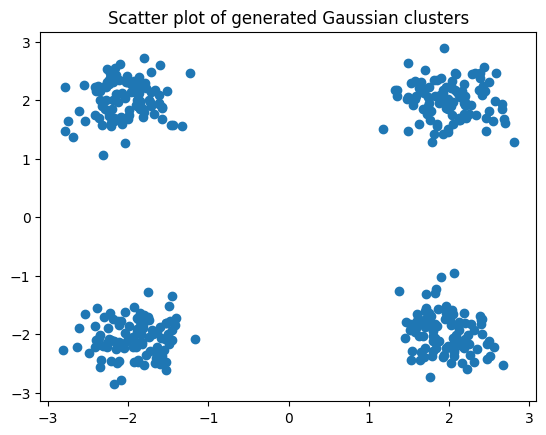

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [6]:

nsample = 100
means = [(2, 2), (-2, 2), (2, -2), (-2, -2)]
cov = [[0.1, 0], [0, 0.1]]
class_1 = np.random.multivariate_normal(means[0], cov, nsample)
class_2 = np.random.multivariate_normal(means[1], cov, nsample)
class_3 = np.random.multivariate_normal(means[2], cov, nsample)
class_4 = np.random.multivariate_normal(means[3], cov, nsample)

X = np.vstack((class_1, class_2, class_3, class_4))
y = np.array([0]*nsample + [1]*nsample + [2]*nsample + [3]*nsample)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Scatter plot of generated Gaussian clusters")
plt.show()
y








In [7]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train_sm.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test_sm.reshape(-1, 1))


def softmax(z):
    expz = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return expz / np.sum(expz, axis=1, keepdims=True)


def gradient_descent_sm(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape  
    k = y.shape[1]  
    W = np.zeros((n, k))  
    b = np.zeros((1, k))  
    costs = []
    
    for i in range(iterations):
        Z = np.dot(X, W) + b
        A = softmax(Z)
        cost = - (1/m) * np.sum(y * np.log(A))
        costs.append(cost)
        dW = (1/m) * np.dot(X.T, (A - y))
        db = (1/m) * np.sum(A - y, axis=0, keepdims=True)
        W -= learning_rate * dW
        b -= learning_rate * db
        if i % 100 == 0:
            print(f"Iteration {i}: binarycrossentropy = {cost}")
    return W, b, costs

W, b, costs = gradient_descent_sm(X_train_sm, y_train_encoded, learning_rate=0.1, iterations=1000)





Iteration 0: binarycrossentropy = 1.3862943611198904
Iteration 100: binarycrossentropy = 0.06058096622596218
Iteration 200: binarycrossentropy = 0.031146201170750714
Iteration 300: binarycrossentropy = 0.02113027921380283
Iteration 400: binarycrossentropy = 0.01605804620406919
Iteration 500: binarycrossentropy = 0.012984539619365285
Iteration 600: binarycrossentropy = 0.010918646739300028
Iteration 700: binarycrossentropy = 0.00943250904408031
Iteration 800: binarycrossentropy = 0.008310896987849946
Iteration 900: binarycrossentropy = 0.007433604647739265


c:\Users\Nani Panyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:

def predict(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return np.argmax(A, axis=1)
y_pred_train_sm = predict(X_train_sm, W, b)
y_pred_test_sm = predict(X_test_sm, W, b)

train_accuracy_sm = np.mean(y_pred_train_sm == y_train_sm) * 100
test_accuracy_sm = np.mean(y_pred_test_sm == y_test_sm) * 100

print(f"Training Accuracy: {train_accuracy_sm:.2f}%")
print(f"Test Accuracy: {test_accuracy_sm:.2f}%")


Training Accuracy: 100.00%
Test Accuracy: 100.00%
